In [1]:
import anndata as ad
import scanpy as sc
import pandas as pd
import scipy as sp
import numpy as np
import pickle as pkl
from sklearn.cluster import KMeans
import igraph as ig
import leidenalg as la
import utils

# Gaussian neibourhood generation using MrVI latent space 

In [3]:
# ranked_genes_gauss = utils.mrvi_identify_cell_states(adata, 'X_mrvi_z', neighbor_method='gauss')

In [4]:
adata_gauss = utils.load_pickle('./../data/pickles/processed_adata.pickle')
adata_gauss

AnnData object with n_obs × n_vars = 9265 × 3766
    obs: 'sample', 'replicate', '_scvi_sample', '_scvi_labels', 'n_genes', 'leiden'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'log1p', 'neighbors', 'leiden', 'rank_genes_groups'
    obsm: 'X_mrvi_u', 'X_mrvi_z', '_scvi_categorical_nuisance_keys'
    obsp: 'distances', 'connectivities'

In [6]:
adata_gauss.obsp['connectivities'] = sp.sparse.csr_matrix(adata_gauss.obsp['connectivities'], dtype=np.float32)

In [11]:
sc.tl.umap(adata_gauss)

# KNN neighbourhood generation using MrVI latent space

In [2]:
adata_knn = sc.read('./../data/MrVIoutputs/bacdrop.h5ad')
adata_knn

AnnData object with n_obs × n_vars = 34410 × 3766
    obs: 'sample', 'replicate', '_scvi_sample', '_scvi_labels', 'n_genes'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid'
    obsm: 'X_mrvi_u', 'X_mrvi_z', '_scvi_categorical_nuisance_keys'

In [5]:
sc.pp.filter_cells(adata_knn, min_genes=35)
sc.pp.normalize_total(adata_knn, target_sum=5000)
sc.pp.log1p(adata_knn)

adata_knn.raw = adata_knn

sc.pp.neighbors(adata_knn, use_rep='X_mrvi_z', knn=True)

sc.tl.leiden(adata_knn)

In [7]:
sc.tl.umap(adata_knn)

# Visuals

In [8]:
# Not informative (UMAP provides the better 2D representation)
# sc.pl.embedding(adata, basis='X_mrvi_z', color='leiden', use_raw=False)

/home/dennis/miniconda3/envs/compbioGPU/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


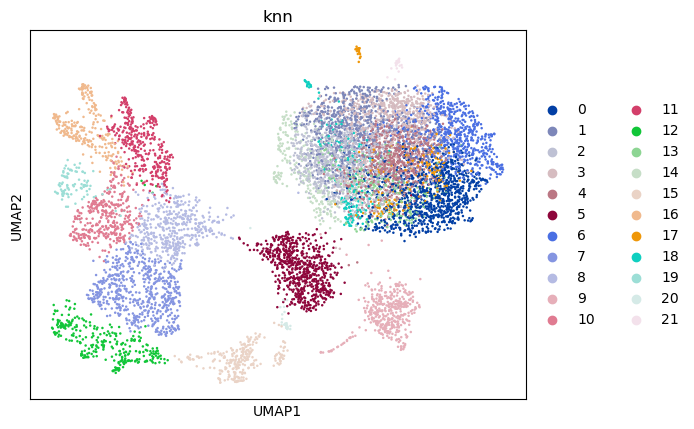

In [9]:
sc.pl.umap(adata_knn, use_raw=False, color='leiden', title="knn")

/home/dennis/miniconda3/envs/compbioGPU/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


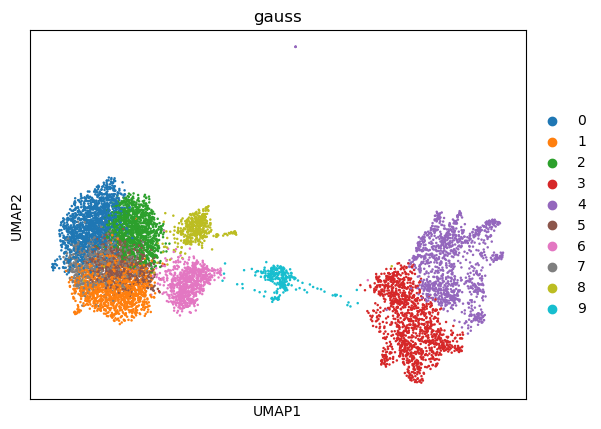

In [12]:
sc.pl.umap(adata_gauss, use_raw=False, color='leiden', title="gauss")

In [ ]:
sc.pl.umap(adata_gauss, color=['CST3', 'NKG7', 'PPBP'])